In [22]:
import random
import math

In [23]:
def distance(point1, point2):
    return math.sqrt((point2[0]-point1[0])**2 + (point2[1]-point1[1])**2)

In [24]:
def fitness(solution, cities):
    # Calculate the total distance traveled
    total_distance = 0
    for i in range(len(solution)-1):
        total_distance += distance(cities[solution[i]], cities[solution[i+1]])
    total_distance += distance(cities[solution[-1]], cities[solution[0]])
    return total_distance

In [25]:
def initialize(num_fireflies, num_cities):
    # Initialize the fireflies randomly
    fireflies = []
    for i in range(num_fireflies):
        fireflies.append(random.sample(range(num_cities), num_cities))
    return fireflies

In [26]:
def attractiveness(distance):
    # Calculate the attractiveness based on the distance
    return math.exp(-distance)

In [27]:
def move(firefly, other_firefly, alpha, beta):
    # Move the firefly towards the other firefly
    distance = fitness(firefly, cities)
    other_distance = fitness(other_firefly, cities)
    if other_distance < distance:
        attractiveness_value = attractiveness(other_distance)
        for i in range(len(firefly)):
            r = random.uniform(-1, 1)
            firefly[i] += attractiveness_value * math.exp(-beta*r) * (other_firefly[i]-firefly[i]) + alpha * (random.random()-0.5)
    return firefly

In [28]:
def sort_fireflies(fireflies, cities):
    # Sort the fireflies based on their fitness
    fireflies_fitness = [(firefly, fitness(firefly, cities)) for firefly in fireflies]
    fireflies_fitness.sort(key=lambda x: x[1])
    return [firefly for firefly, _ in fireflies_fitness]

In [29]:
def firefly_algorithm(num_fireflies, num_cities, max_generations):
    # Initialize the fireflies
    fireflies = initialize(num_fireflies, num_cities)
    best_fitness = float('inf')
    best_solution = []
    for i in range(max_generations):
        # Sort the fireflies based on their fitness
        fireflies = sort_fireflies(fireflies, cities)

        # Move the fireflies towards each other
        for j in range(num_fireflies):
            for k in range(j+1, num_fireflies):
                fireflies[j] = move(fireflies[j], fireflies[k], 0.01, 1)

        # Update the best solution
        current_fitness = fitness(fireflies[0], cities)
        if current_fitness < best_fitness:
            best_fitness = current_fitness
            best_solution = fireflies[0]

    return best_solution, best_fitness

In [30]:
# Define the cities
cities = [(60, 200), (180, 200), (80, 180), (140, 180), (20, 160), (100, 160), (200, 160), (140, 140), (40, 120), (100, 120), (180, 100), (60, 80), (120, 80), (180, 60), (20, 40), (100, 40), (200, 40), (20, 20), (60, 20), (160, 20)]

In [31]:
# Run the firefly algorithm
num_fireflies = 50
max_generations = 100
best_solution, best_fitness = firefly_algorithm(num_fireflies, len(cities), max_generations)

In [32]:
# Print the best solution and its fitness
print("Best solution: ", best_solution)
print("Best fitness: ", round(best_fitness,2))

Best solution:  [16, 9, 12, 19, 14, 18, 15, 13, 7, 5, 2, 0, 3, 1, 8, 17, 11, 4, 6, 10]
Best fitness:  1607.41


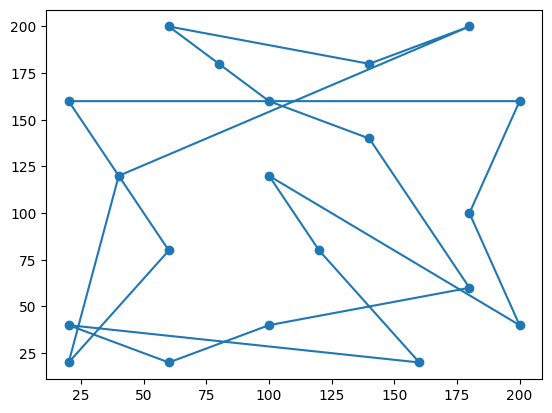

In [33]:
import matplotlib.pyplot as plt

# Plot the cities
x = [city[0] for city in cities]
y = [city[1] for city in cities]
plt.scatter(x, y)

# Plot the path traveled by the salesman
x = [cities[best_solution[i]][0] for i in range(len(best_solution))]
y = [cities[best_solution[i]][1] for i in range(len(best_solution))]
x.append(cities[best_solution[0]][0])
y.append(cities[best_solution[0]][1])
plt.plot(x, y)

# Show the plot
plt.show()

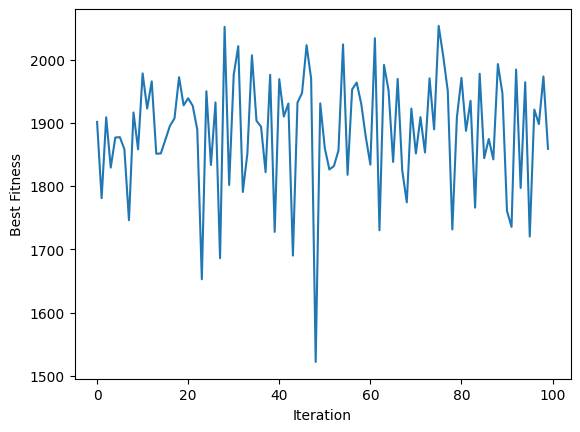

In [34]:
# Run the firefly algorithm and record the best fitness in each iteration
num_fireflies = 50
max_generations = 100
best_fitnesses = []
for i in range(max_generations):
    best_solution, best_fitness = firefly_algorithm(num_fireflies, len(cities), 1)
    best_fitnesses.append(best_fitness)

# Plot the convergence of the firefly algorithm
plt.plot(best_fitnesses)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.show()

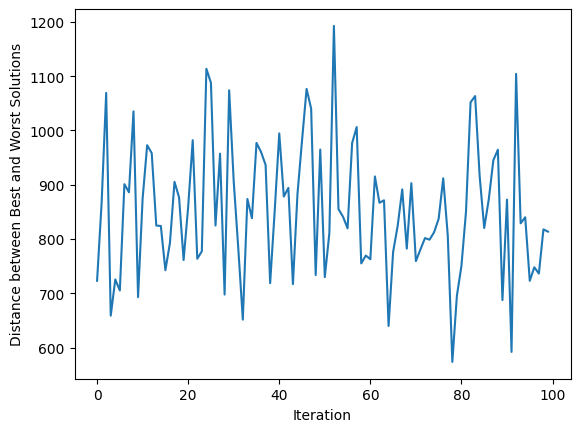

In [35]:
# Run the firefly algorithm and record the distances between the best and worst solutions in each iteration
num_fireflies = 50
max_generations = 100
distances = []
for i in range(max_generations):
    fireflies = initialize(num_fireflies, len(cities))
    fireflies = sort_fireflies(fireflies, cities)
    best_distance = fitness(fireflies[0], cities)
    worst_distance = fitness(fireflies[-1], cities)
    distances.append(worst_distance - best_distance)
    for j in range(num_fireflies):
        for k in range(j+1, num_fireflies):
            fireflies[j] = move(fireflies[j], fireflies[k], 0.01, 1)
    fireflies = sort_fireflies(fireflies, cities)

# Plot the diversity of the firefly population over time
plt.plot(distances)
plt.xlabel('Iteration')
plt.ylabel('Distance between Best and Worst Solutions')
plt.show()